In [110]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

In [9]:
df.head(5)

,phone_model,phone_generation,phone_size,phone_color,claim,weeks_monday,month,year,month_year
0,apple iphone 11,iphone 11,128gb,black,111,2021-06-28,6,2021,2021-06-01
1,apple iphone 11,iphone 11,128gb,black,319,2021-07-05,7,2021,2021-07-01
2,apple iphone 11,iphone 11,128gb,black,320,2021-07-12,7,2021,2021-07-01
3,apple iphone 11,iphone 11,128gb,black,305,2021-07-19,7,2021,2021-07-01
4,apple iphone 11,iphone 11,128gb,black,269,2021-07-26,7,2021,2021-07-01


In [10]:
newer_iphone_df = df[(df['phone_generation'] == 'iphone x') | (df['phone_generation'] == 'iphone 11') | (df['phone_generation'] == 'iphone 12') | (df['phone_generation'] == 'iphone 13') | (df['phone_generation'] == 'iphone 14')]

In [16]:
mask_jun_2021 = ~((newer_iphone_df['month'] == 6) & (newer_iphone_df['year'] == 2021))
mask_feb_2023 = ~((newer_iphone_df['month'] == 2) & (newer_iphone_df['year'] == 2023))
data_no_left_tail = newer_iphone_df[mask_jun_2021]
data_no_tails = data_no_left_tail[mask_feb_2023]

C:\Users\jiax2\AppData\Local\Temp\ipykernel_7376\1648532660.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_tails = data_no_left_tail[mask_feb_2023]


In [42]:
by_month_df = data_no_tails.groupby(['phone_generation', 'month_year'])['claim'].sum().reset_index()
by_month_df = by_month_df.sort_values(by='month_year')
by_month_df.head(5)

,phone_generation,month_year,claim
0,iphone 11,2021-07-01,15068
19,iphone 12,2021-07-01,4363
56,iphone x,2021-07-01,11950
57,iphone x,2021-08-01,12703
20,iphone 12,2021-08-01,6714


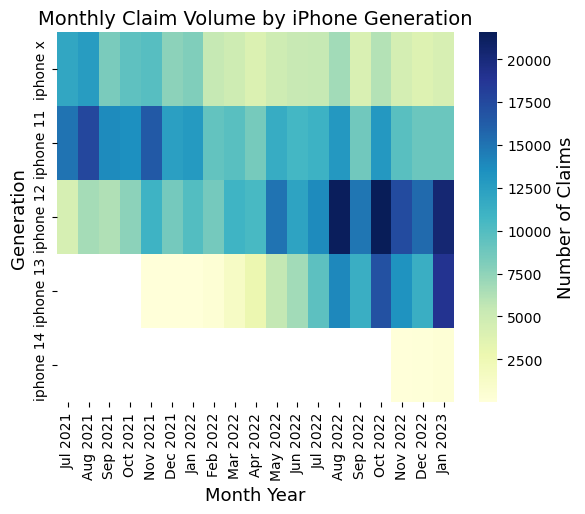

In [56]:
pivot_table = pd.pivot_table(by_month_df, values='claim', index='phone_generation', columns='month_year')

phone_order = ['iphone x', 'iphone 11', 'iphone 12', 'iphone 13', 'iphone 14']
pivot_table = pivot_table.reindex(phone_order)

formatted_dates = [date.strftime('%b %Y') for date in pivot_table.columns]

ax = sns.heatmap(pivot_table, cmap='YlGnBu')
ax.set_title('Monthly Claim Volume by iPhone Generation', fontsize=14)

ax.set_xlabel('Month Year', fontsize=13)
ax.set_xticklabels(formatted_dates)
ax.set_ylabel('Generation', fontsize=13)

cbar = ax.collections[0].colorbar
cbar.set_label('Number of Claims', fontsize=13)

plt.show()

### iPhone 14 came out on September 16, 2022. Claims for all other phone generations drop in September 2022

### iPhone 13 came out in September 14, 2021. Claims for other phone models drop in September 2021

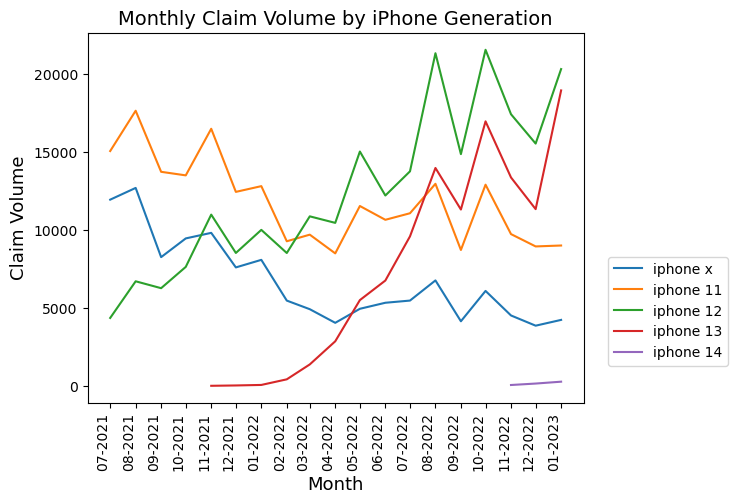

In [67]:
generation_order = ['iphone x', 'iphone 11', 'iphone 12', 'iphone 13', 'iphone 14']
sns.lineplot(data=by_month_df, x='month_year', y='claim', hue='phone_generation', hue_order=generation_order)

plt.xlabel('Month', fontsize=13)
plt.ylabel('Claim Volume', fontsize=13)
plt.title('Monthly Claim Volume by iPhone Generation', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

plt.legend(loc=(1.05, 0.1))
plt.show()

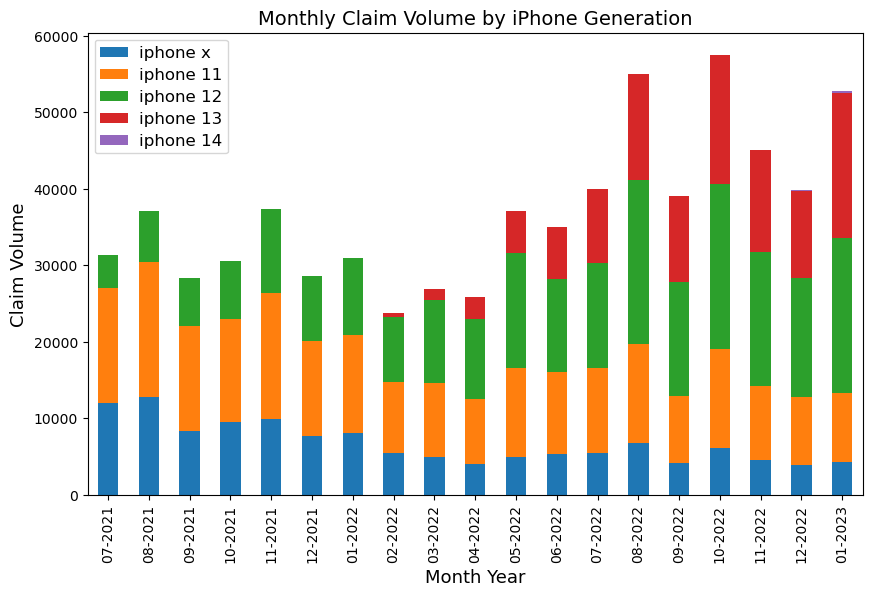

In [74]:
order = ['iphone x', 'iphone 11', 'iphone 12', 'iphone 13', 'iphone 14']
stacked_data = by_month_df.pivot(index='month_year', columns='phone_generation', values='claim')[order]

ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xticklabels(stacked_data.index.strftime('%m-%Y'))

ax.set_xlabel('Month Year', fontsize=13)
ax.set_ylabel('Claim Volume', fontsize=13)
ax.set_title('Monthly Claim Volume by iPhone Generation', fontsize=14)

# Set the legend position and format
ax.legend(loc='upper left', labels=order)
plt.setp(ax.get_legend().get_texts(), fontsize='12')

# Show plot
plt.show()